# 数据探索

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import brfss

%config InlineBackend.figure_format = 'retina'

In [2]:
df = brfss.ReadBrfss()

In [3]:
df.head()

,sex,age,edu,marital,employ,income,health,bmi,height,weight,exercise,workhour,exemin,fruit,vegetable
0,F,63,4,1,8,3.0,5.0,40.18,1.78,127.01,0.0,NaN,NaN,0.0,1.0
1,F,52,6,2,3,1.0,3.0,25.09,1.73,74.84,1.0,60.0,168.0,0.0,0.0
2,F,71,4,2,7,NaN,4.0,22.04,1.80,71.67,NaN,NaN,NaN,NaN,NaN
3,F,63,4,1,8,8.0,5.0,28.19,1.70,81.65,0.0,NaN,NaN,1.0,0.0
4,F,61,5,1,8,NaN,5.0,24.37,1.63,64.41,0.0,45.0,NaN,NaN,1.0


**问题：富人会更胖吗？**

## 描述性统计

In [4]:
bmi_income = df[['bmi','income']].dropna()

In [13]:
len(bmi_income)

343092

In [5]:
bmi_rich = bmi_income[bmi_income.income == 8]['bmi']
bmi_ord = bmi_income[bmi_income.income != 8]['bmi']

In [36]:
bmi_rich.describe()

count    110259.000000
mean         27.450733
std           5.900353
min          12.050000
25%          23.690000
50%          26.570000
75%          30.040000
max          97.650000
Name: bmi, dtype: float64

In [37]:
bmi_ord.describe()

count    232833.000000
mean         28.537320
std           6.971436
min          12.020000
25%          24.030000
50%          27.370000
75%          31.620000
max          97.650000
Name: bmi, dtype: float64

In [19]:
len(bmi_rich)

110259

In [38]:
len(bmi_ord)

232833

### 中心趋势

In [94]:
mean_rich = bmi_rich.mean()
mean_ord = bmi_ord.mean()
print('BMI mean of rich people: %.2f' % mean_rich)
print('BMI mean of ordinary people: %.2f' % mean_ord)

BMI mean of rich people: 27.45
BMI mean of ordinary people: 28.54


In [114]:
median_rich = bmi_rich.median()
median_ord = bmi_ord.median()
print('BMI median of rich people: %.2f' % median_rich)
print('BMI median of ordinary people: %.2f' % median_ord)

BMI median of rich people: 26.57
BMI median of ordinary people: 27.37


In [63]:
## 对连续变量，不能这么求mode，mode是一个区间,但也可以将bmi看出离散的，因为只保留到小数后两位
# mode of rich people
mode_rich = bmi_rich.mode().iloc[0]
mode_count_rich = np.sum(bmi_rich == mode_rich)
print('BMI mode of rich people: %.2f (counts %d)' % (mode_rich, mode_count_rich))

# mode of ordinary people
mode_ord = bmi_ord.mode().iloc[0]
mode_count_ord = np.sum(bmi_ord == mode_ord)
print('BMI mode of ordinary people: %.2f (counts %d)' % (mode_ord, mode_count_ord))

BMI mode of rich people: 26.63 (counts 1246)
BMI mode of ordinary people: 26.63 (counts 2766)


**different measures**: difference between means

In [96]:
print("mean difference (rich - ordinary) :  %.2f" % (mean_rich - mean_ord))

mean difference (rich - ordinary) :  -1.09


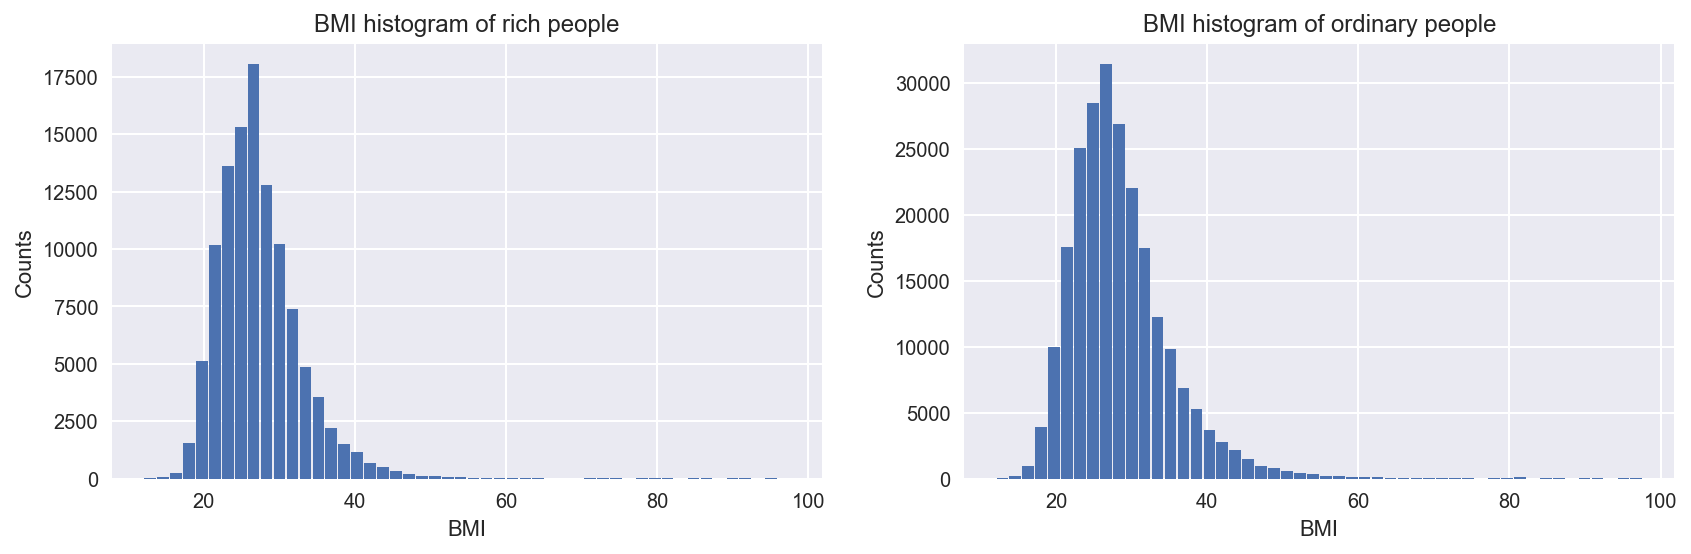

In [107]:
fig = plt.figure(figsize=(14,4))

# bmi histogram of rich people
p1 = fig.add_subplot(121)
plt.hist(bmi_rich, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of rich people')

#bmi histogram of ordinary people
p2 = fig.add_subplot(122)
plt.hist(bmi_ord, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of ordinary people')

plt.show()

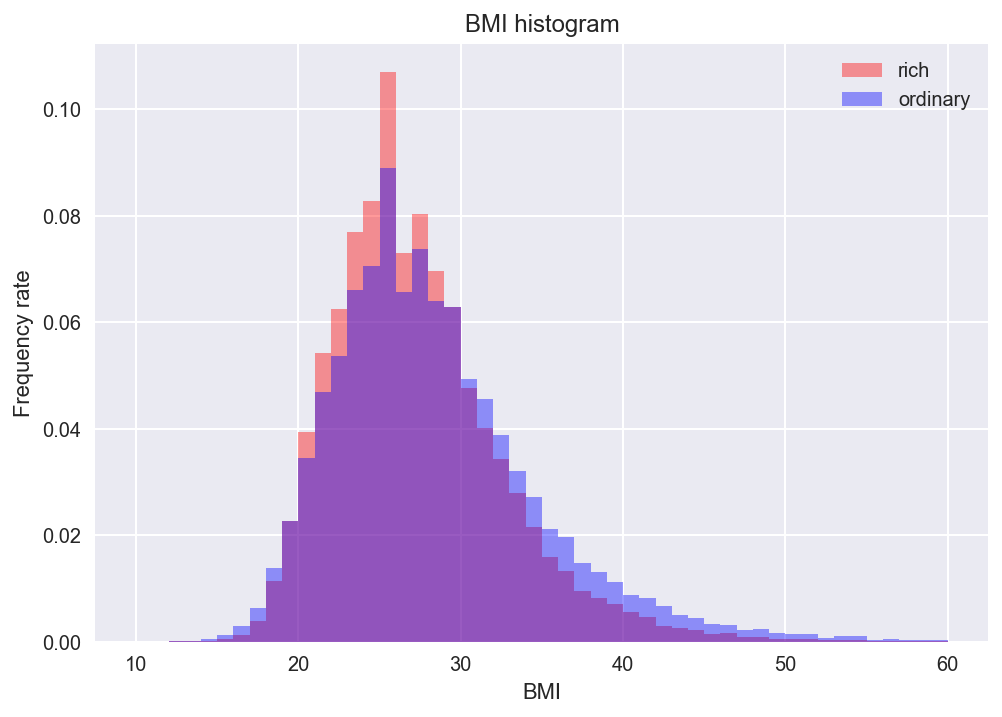

In [109]:
plt.hist(bmi_rich, bins=50, range=(10,60), normed=True, label='rich', alpha=0.4, color='red')
plt.hist(bmi_ord, bins=50, range=(10,60), normed=True, label='ordinary', alpha=0.4, color='blue')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('frequency rate')
plt.title('BMI histogram')
plt.show()

#### 直方图补充内容
* right/left skew
* 连续 or 不连续


mode range: (25.00, 26.00)
median: 26.57
mean: 27.45
skewness: 2.58


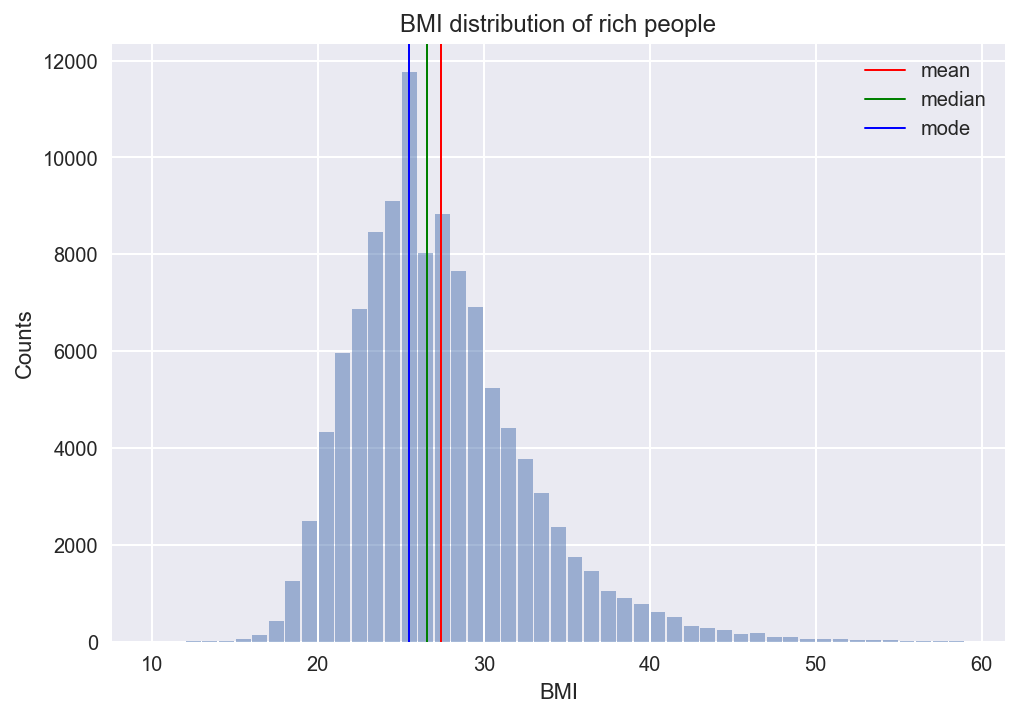

In [173]:
# mode range
bin_edge = np.arange(10,60,1)
counts, bins = np.histogram(bmi_rich, bin_edge)
mode_left = bins[np.argmax(counts)]
mode_right = bins[np.argmax(counts)+1]
mode_middle = (mode_left + mode_right) / 2
print('mode range: (%.2f, %.2f)' % (mode_left, mode_right))
print('median: %.2f' % median_rich)
print('mean: %.2f' % mean_rich)

# skewness
print('skewness: %.2f' %bmi_rich.skew())


# plot
plt.axvline(x=mean_rich, linewidth=1, color='red', label='mean')
plt.axvline(x=median_rich, linewidth=1, color='green', label='median')
plt.axvline(x=mode_middle, linewidth=1, color='blue', label='mode')
plt.legend()

plt.hist(bmi_rich, bins=bin_edge, range=(10,60), rwidth=0.9, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI distribution of rich people')
plt.show()



skewness: -0.74


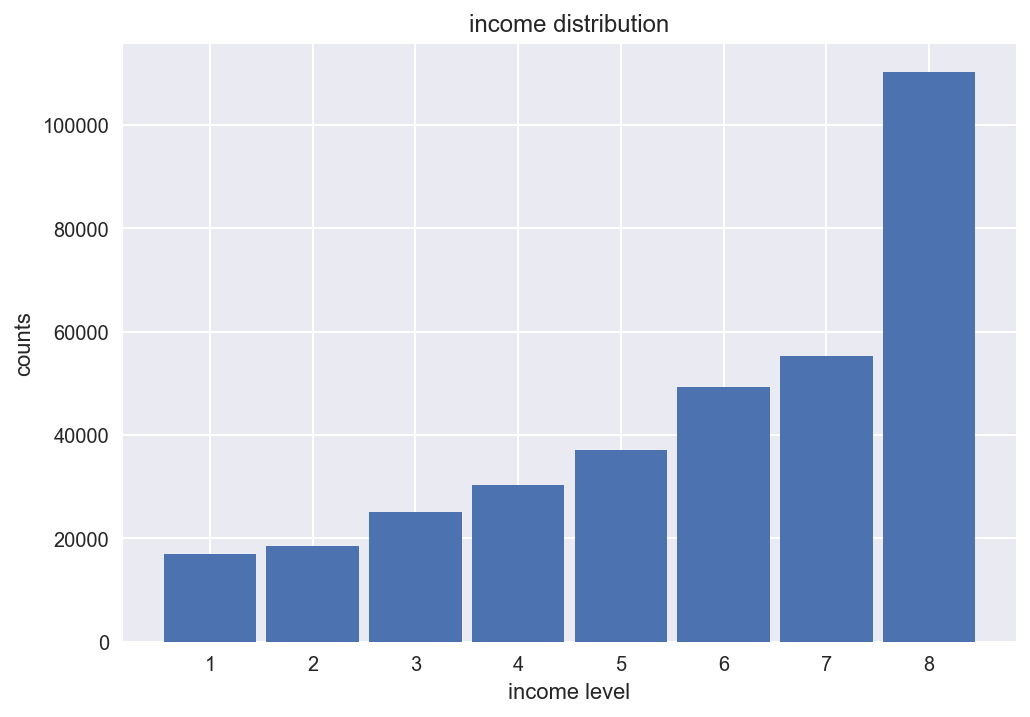

In [174]:
# skewness
print('skewness: %.2f' %bmi_income.income.skew())

bins = np.arange(1,10)
plt.hist(bmi_income.income, align='left', bins=bins, rwidth=0.9)
plt.title('income distribution')
plt.xlabel('income level')
plt.ylabel('counts')
plt.show()

### span 跨度

In [217]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / float(len(x))
    return (x,y)

def plot_ecdf(data, xlabel=None , ylabel='ECDF', label=None):
    
    # Compute ECDF: x, y
    x, y = ecdf(data)

    # Plot the ECDF with labeled axes
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none', label=label)
    _ = plt.legend(markerscale=4)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)

#    plt.show()

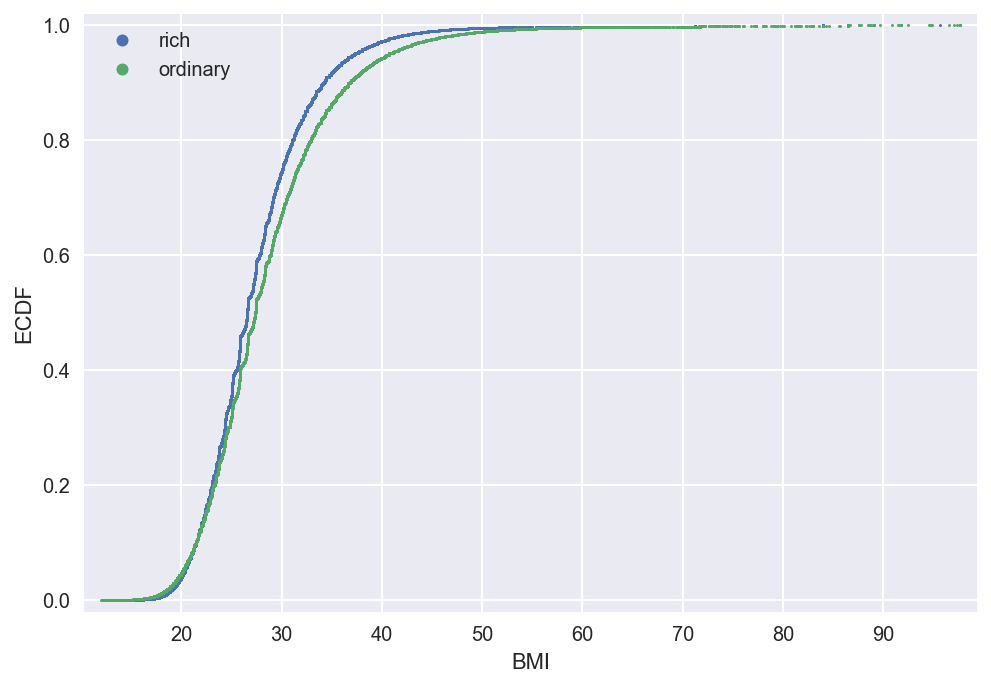

In [218]:
plot_ecdf(bmi_rich,label='rich')
plot_ecdf(bmi_ord, xlabel='BMI',label='ordinary')
plt.show()

In [232]:
q1 = bmi_rich.quantile(0.25)
q2 = bmi_rich.quantile(0.5)
q3 = bmi_rich.quantile(0.75)
IQR = q3 - q1

print('25%:  ', q1)
print('50%:  ', q2)
print('75%:  ', q3)
print('IQR:   %.2f' % IQR)

25%:   23.69
50%:   26.57
75%:   30.04
IQR:   6.35


In [10]:
print('min:  ', bmi_rich.min())
print('max:  ', bmi_rich.max())

min:   12.05
max:   97.65


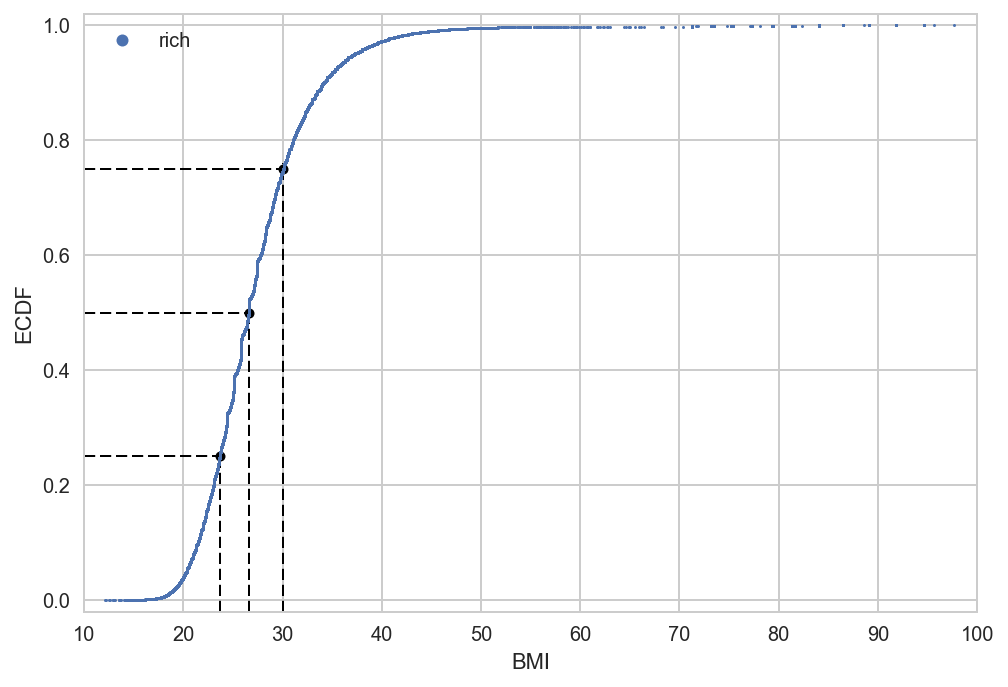

In [337]:

def plot_quantile(p, q, xmin=10, xmax=100):
    x_scale = (q - xmin) / (xmax - xmin)    
    plt.axhline(y=p, xmax=x_scale, linewidth=1, color='black', linestyle='--')
    plt.axvline(x=q, ymax=p, linewidth=1, color='black', linestyle='--')
    plt.plot(q, p, 'k.', markersize=10) 

plt.xlim(xmin=10, xmax=100)   
plot_quantile(0.25, q1)
plot_quantile(0.5, q2)
plot_quantile(0.75, q3)

plot_ecdf(bmi_rich,xlabel='BMI', label='rich')

plt.show()

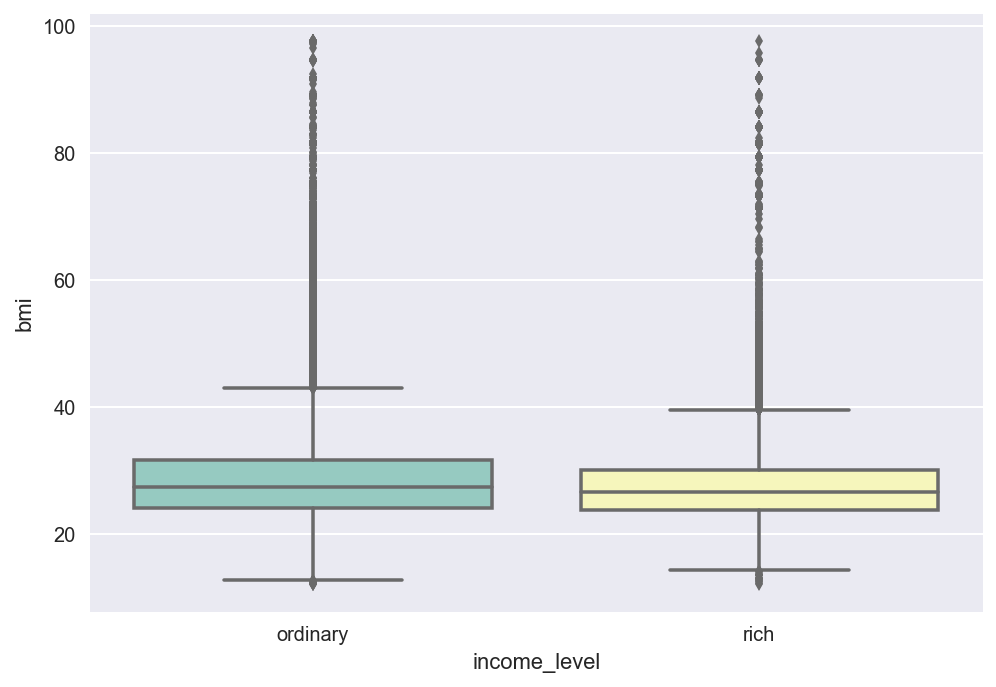

In [7]:
bmi_income['income_level'] = bmi_income.income.apply(lambda x: 'rich' if x==8 else 'ordinary')
sns.boxplot(x='income_level', y='bmi', data=bmi_income, palette="Set3")
plt.show()

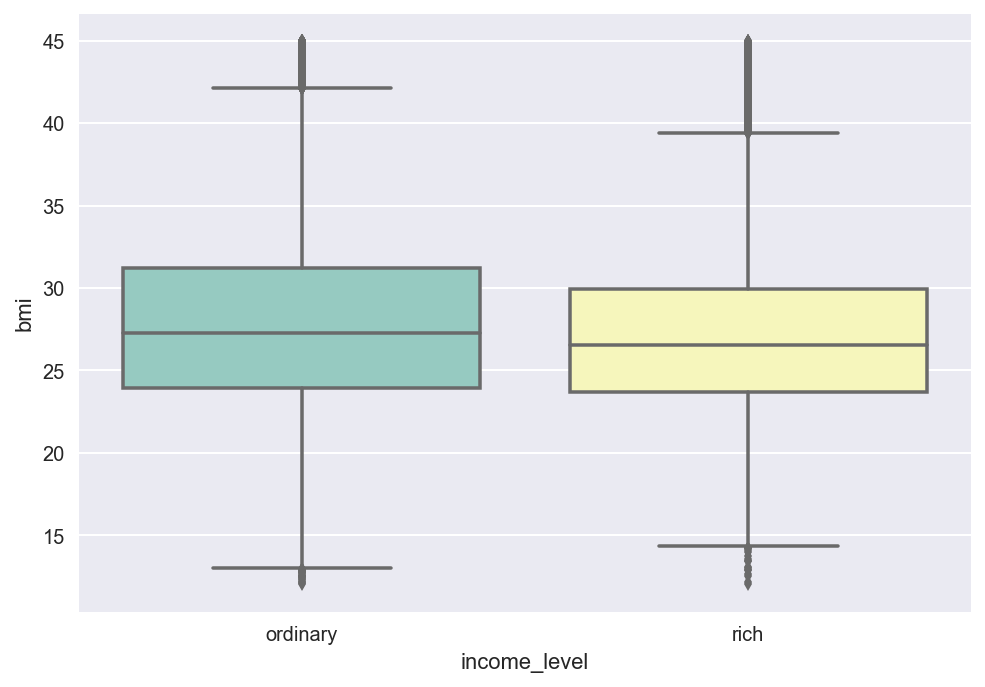

In [9]:
sns.boxplot(x='income_level', y='bmi', data=bmi_income[bmi_income.bmi < 45], palette="Set3")
plt.show()

### 方差和标准差

In [27]:
var = bmi_rich.var()
std = bmi_rich.std()
print('Variance:  %.2f' % var)
print('Standard deviation:  %.2f' % std)

Variance:  34.81
Standard deviation:  5.90


$$ \sigma^2 = \frac{\sum(x_i - \bar{x})^2}{N}$$

$$ \bar{x} = \frac{\sum{x_i}}{N}$$

$$ \sigma = \sqrt{\frac{\sum(x_i - \bar{x})^2}{N-1}}$$

反映波动，后面还会提到。

Standard difference :Cohen's d 
$$ d = \frac{\bar{x_1} - \bar{x_2}}{s_p}  $$

$$s_p = \sqrt{\frac{(n_1 - 1)s_1^2 +(n_2 - 1)s_2^2}{n_1+n_2-2}} $$


In [99]:
def cohen_d(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    sp = np.sqrt(((n1-1)*var1+(n2-1)*var2)/(n1+n2-2))
    return (x1-x2)/sp

print("Cohen's d: %.3f" %cohen_d(bmi_rich, bmi_ord))

Cohen's d: -0.163


### 相关性

covariance:
$$ cov(x,y) = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{N} $$

Pearson correlation coefficient:
$$ \rho = \frac{cov(x,y)}{\sigma_x \sigma_y} $$

In [82]:
df2 = df[['height','weight', 'bmi' ]].dropna()
height = df2.height
weight = df2.weight
bmi = df2.bmi

# covariance
np.cov(height,weight)

array([[  1.12563400e-02,   1.08190764e+00],
       [  1.08190764e+00,   4.67153513e+02]])

In [74]:
print('variance of height: %.4f' % np.var(height))
print('variance of weight: %.2f' % np.var(weight))

variance of height: 0.0113
variance of weight: 467.15


In [75]:
# Pearson correlation
np.corrcoef(height, weight)

array([[ 1.        ,  0.47180417],
       [ 0.47180417,  1.        ]])

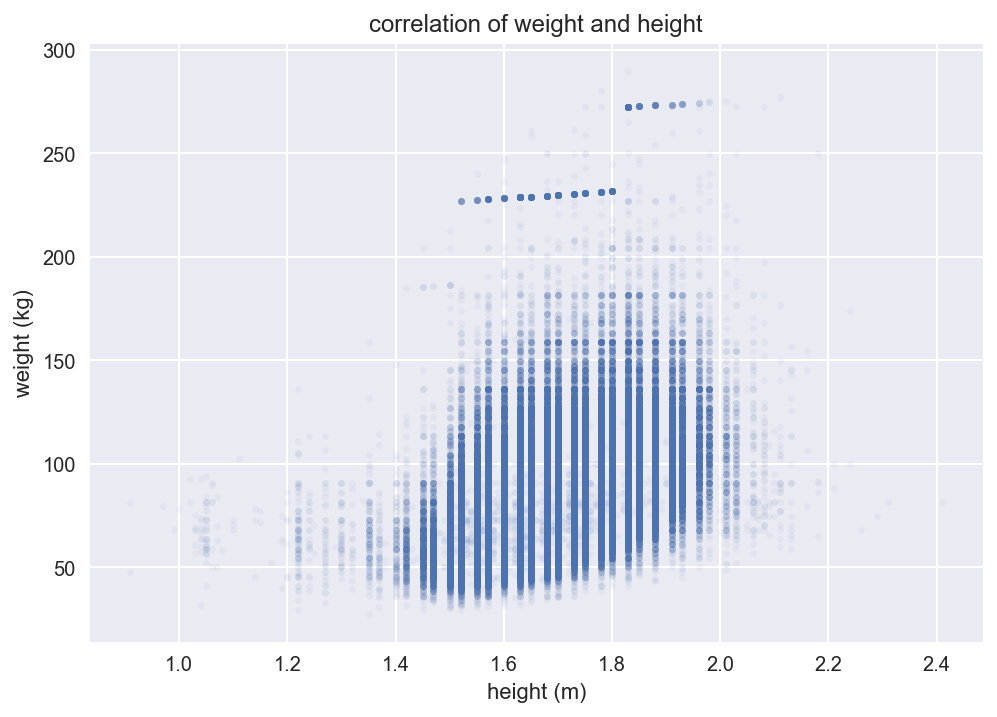

In [77]:
plt.plot(height,weight, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('weight (kg)')
plt.title('correlation of weight and height')
plt.show()

Pearson correlation coefficient: 0.87


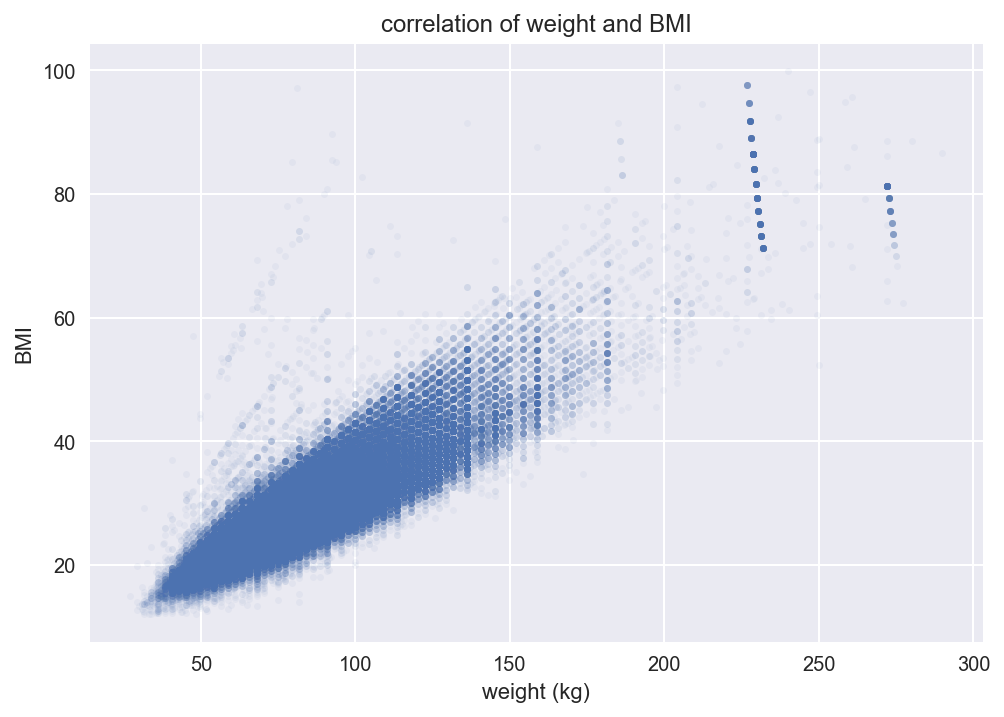

In [90]:
corr = np.corrcoef(weight, bmi)
print('Pearson correlation coefficient: %.2f' % corr[0,1] )
plt.plot(weight,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('weight (kg)')
plt.ylabel('BMI')
plt.title('correlation of weight and BMI')
plt.show()

Pearson correlation coefficient: -0.0060


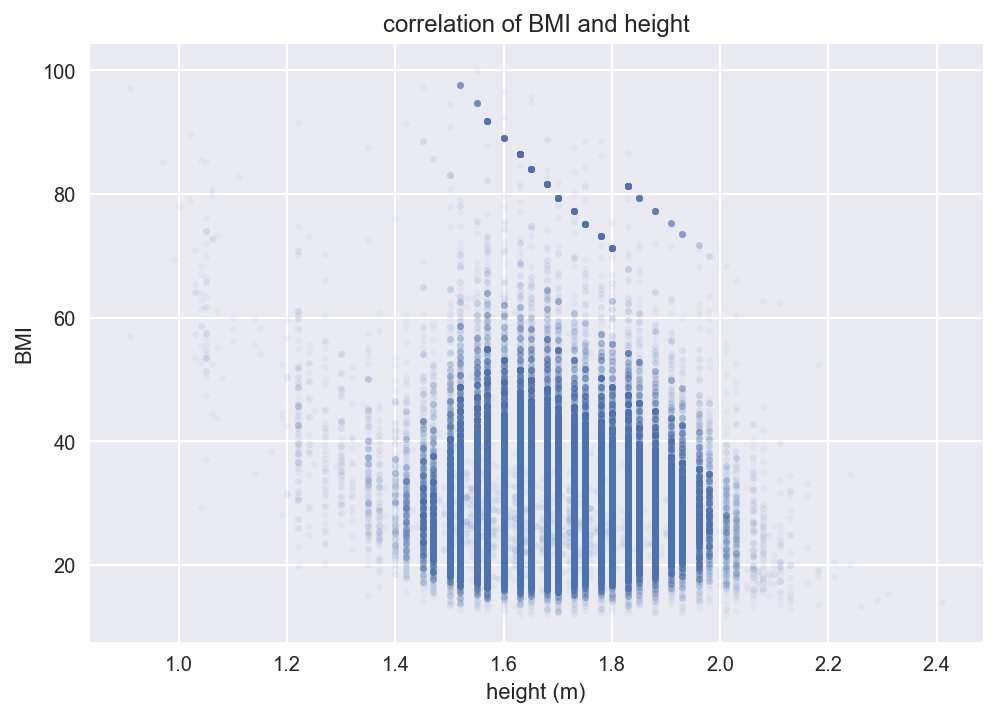

In [91]:
corr = np.corrcoef(height, bmi)
print('Pearson correlation coefficient: %.4f' % corr[0,1] )
plt.plot(height,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('BMI')
plt.title('correlation of BMI and height')
plt.show()

## 统计分布

### Modeling distribution

#### random number generator

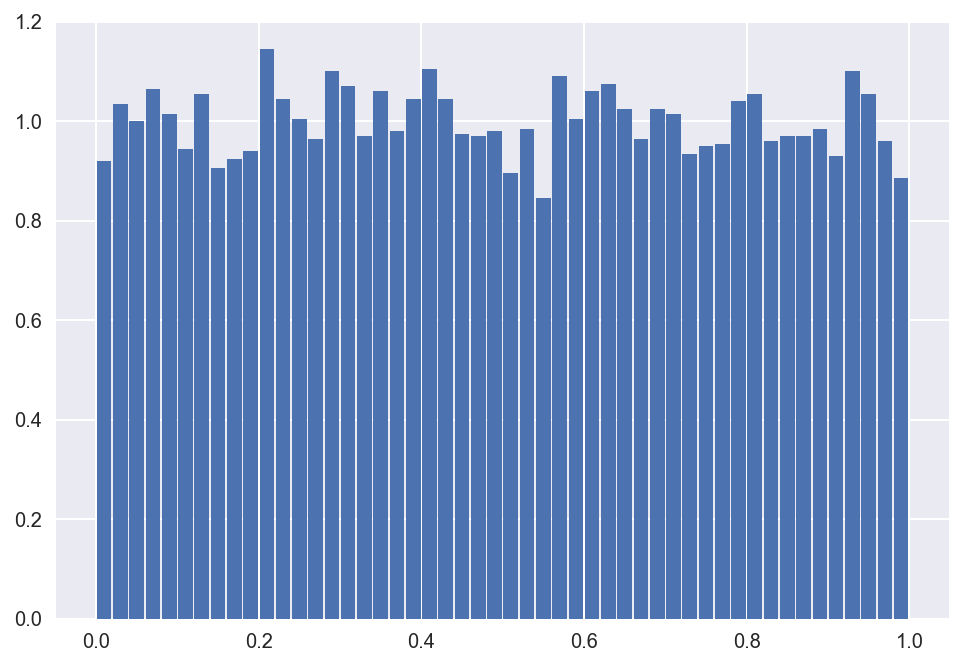

In [158]:
np.random.seed(11)

# Return random floats in the half-open interval [0.0, 1.0).
sample = np.random.random(size=10000)

plt.hist(sample, bins =50, rwidth=0.9, normed=True)
plt.show()

#### Binomial distribution 

投硬币，投10次， 正面朝上的概率

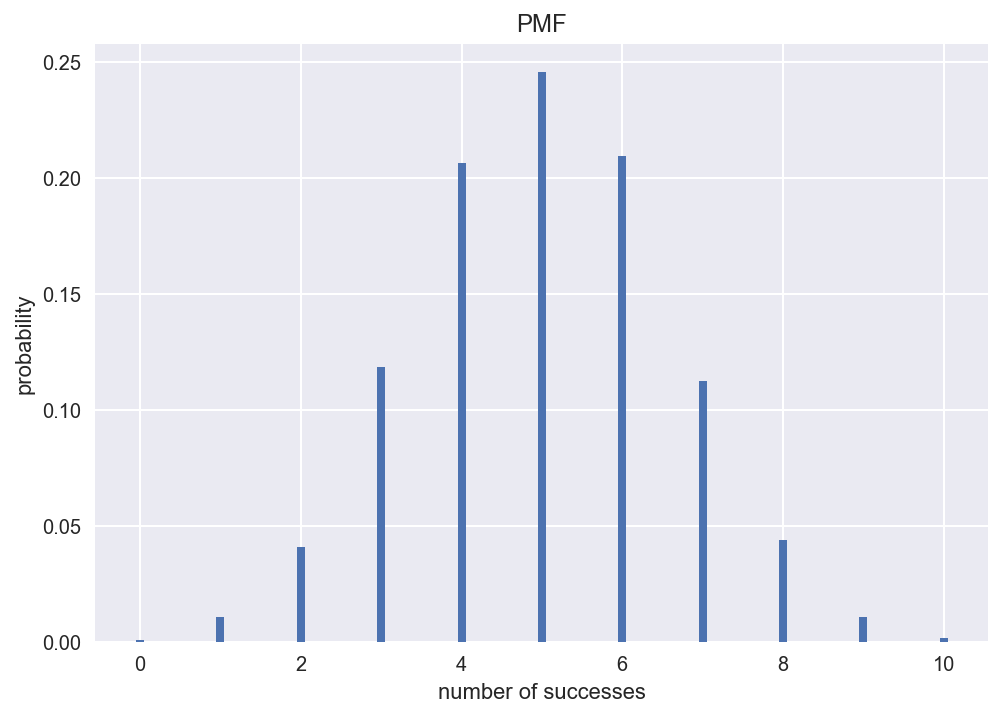

In [216]:
n=10
p=0.5
sample = np.random.binomial(n,p,size=10000)
bins = np.arange(12) 
plt.hist(sample, bins=bins, align='left', normed=True, rwidth=0.1)
plt.title('PMF')
plt.xlabel('number of successes')
plt.ylabel('probability')
plt.show()

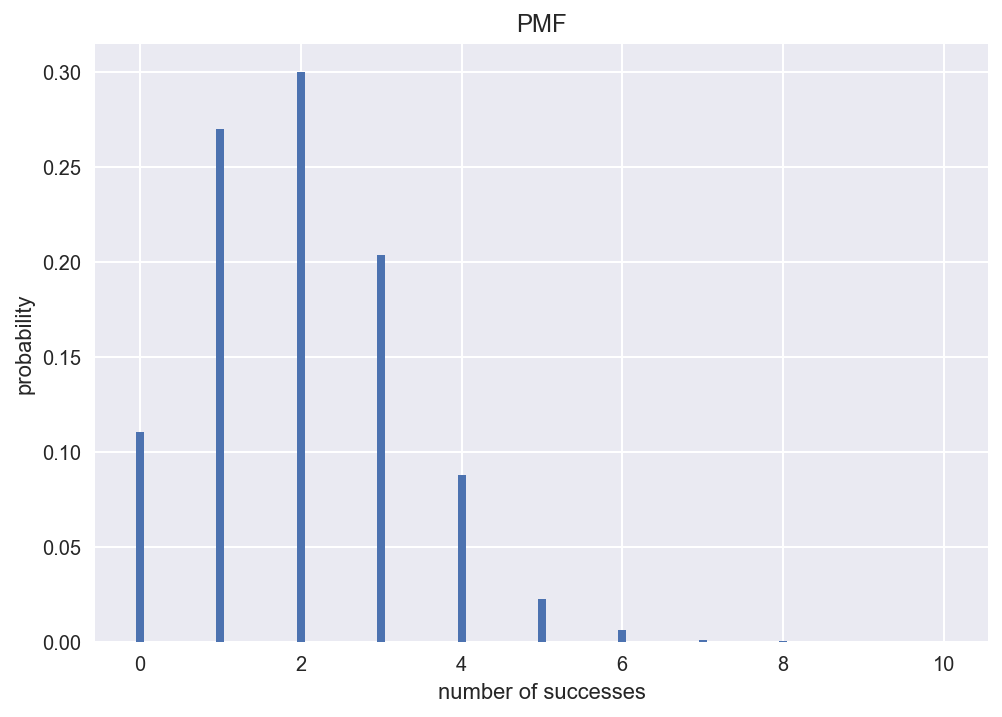

In [217]:
n=10
p=0.2
sample = np.random.binomial(n,p,size=10000)
bins = np.arange(12) 
plt.hist(sample, bins=bins, align='left', normed=True, rwidth=0.1)
plt.title('PMF')
plt.xlabel('number of successes')
plt.ylabel('probability')
plt.show()

#### Poisson distribution

等车，假设下一辆车来的时间与前一辆车无关。在一定时间段内来车的数量， 这段时间的平均来车数是lambda。1小时平均来6辆车。

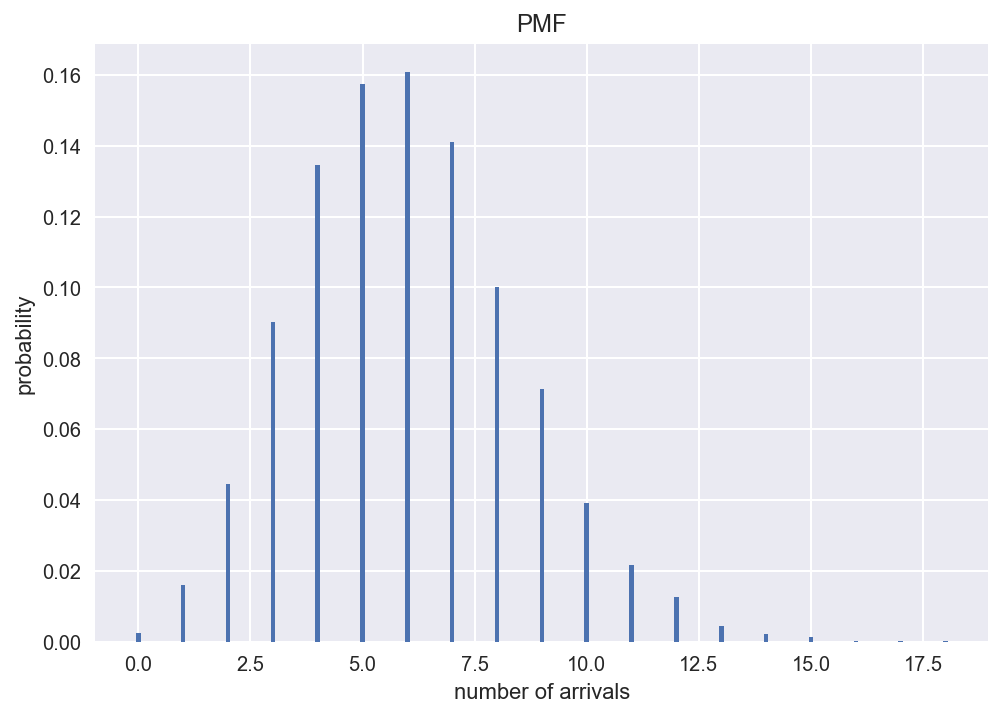

In [219]:
lamb = 6
sample = np.random.poisson(lamb, size=10000)
bins = np.arange(20)
plt.hist(sample, bins=bins, align='left', rwidth=0.1, normed=True)
plt.title('PMF')
plt.xlabel('number of arrivals')
plt.ylabel('probability')
plt.show()

In [215]:
np.mean(sample)

5.9682000000000004

#### exponential distribution

等车的时间， 和泊松分布的关系 the waiting time between arrivals of a Poisson process 每辆车平均间隔10min

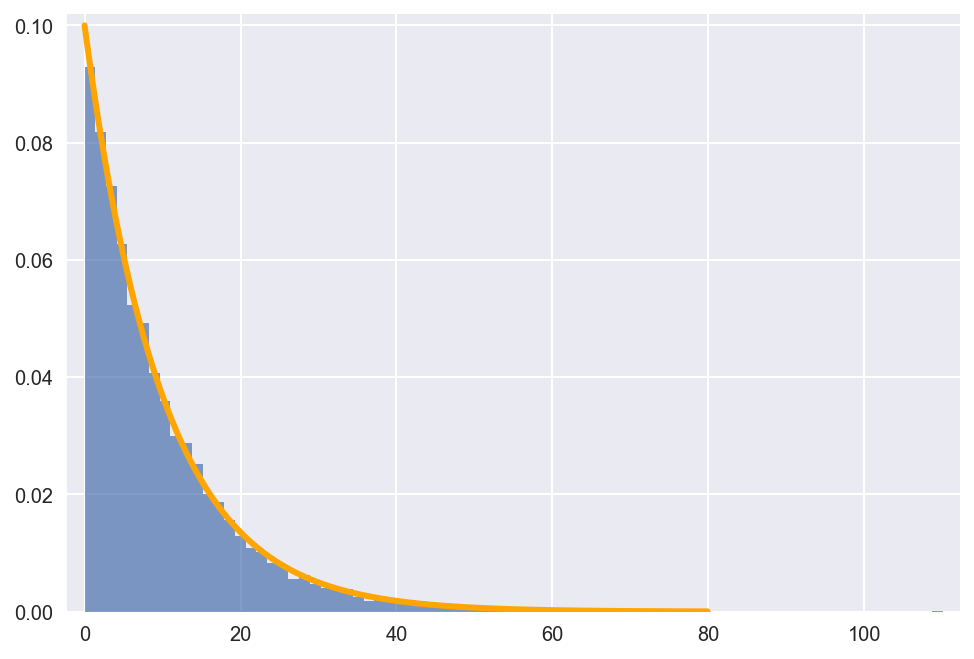

In [252]:
tau = 10
sample = np.random.exponential(tau, size=10000)
plt.hist(sample, bins=80, alpha=0.7, normed=True)
plt.margins(0.02)

lam = 1 / tau
x = np.arange(0,80,0.1)
y = lam * np.exp(- lam * x)
plt.plot(x,y,color='orange', lw=3)
plt.show()

In [238]:
np.mean(sample)

9.9436173723000572

#### normal distribution

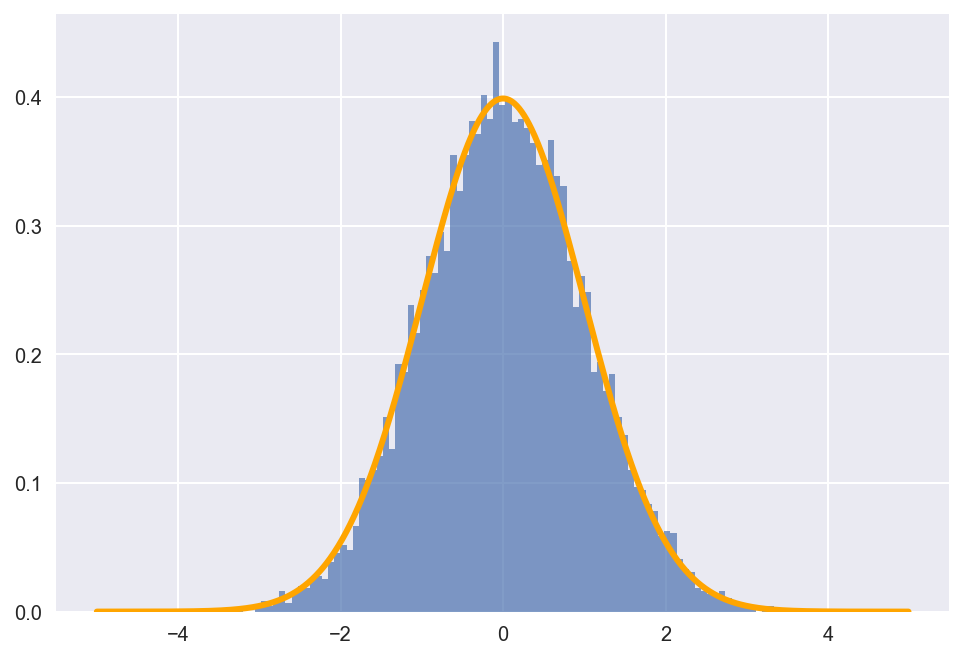

In [254]:
def norm_pdf(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

mu = 0
sigma = 1

sample = np.random.normal(mu, sigma, size=10000)
plt. hist(sample, bins=100, alpha=0.7, normed=True)

x = np.arange(-5, 5, 0.01)
y = norm_pdf(x, mu, sigma)
plt.plot(x,y, color='orange', lw=3)
plt.show()

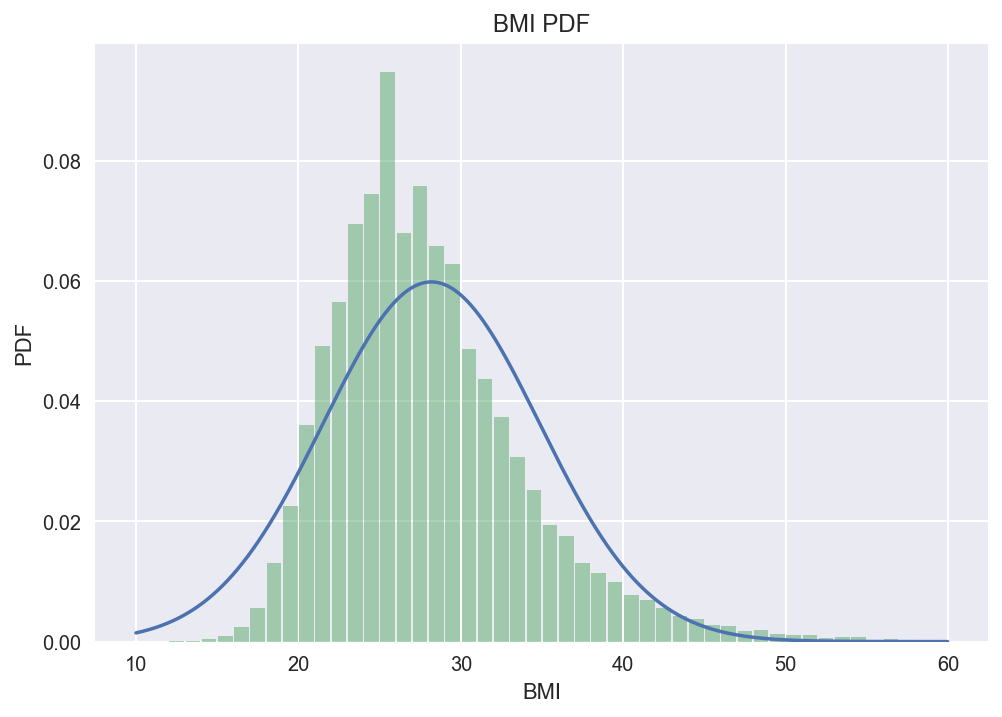

In [295]:
## bmi 的分布， 显然bmi右偏，不满足对称的正态分布

bmi = bmi_income.bmi
# plot normal distribution curve
bmi_std = bmi.std()
bmi_mean = bmi.mean()
x = np.arange(10,60,0.02)
y = norm_pdf(x, bmi_mean, bmi_std)
plt.plot(x,y)

# plot histogram
plt.hist(bmi, bins=50, range=(10,60), rwidth=0.9, alpha=0.5, normed=True)
plt.title('BMI PDF')
plt.xlabel('BMI')
plt.ylabel('PDF')
plt.show()

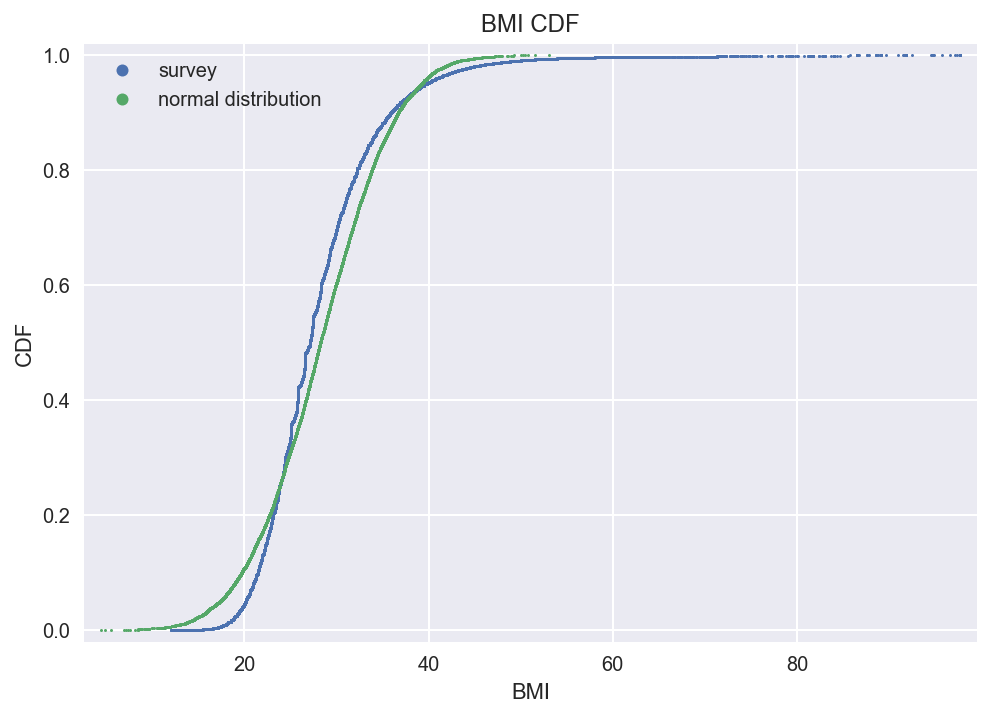

In [266]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / float(len(x))
    return (x,y)

def plot_ecdf(data, xlabel=None , ylabel='CDF', label=None):
    
    # Compute ECDF: x, y
    x, y = ecdf(data)

    # Plot the ECDF with labeled axes
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none', label=label)
    _ = plt.legend(markerscale=4)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)


plot_ecdf(bmi, xlabel='BMI', label='survey')
sample = np.random.normal(bmi_mean, bmi_std, size=10000)
plot_ecdf(sample, xlabel='BMI', label='normal distribution')
plt.title('BMI CDF')
plt.show()

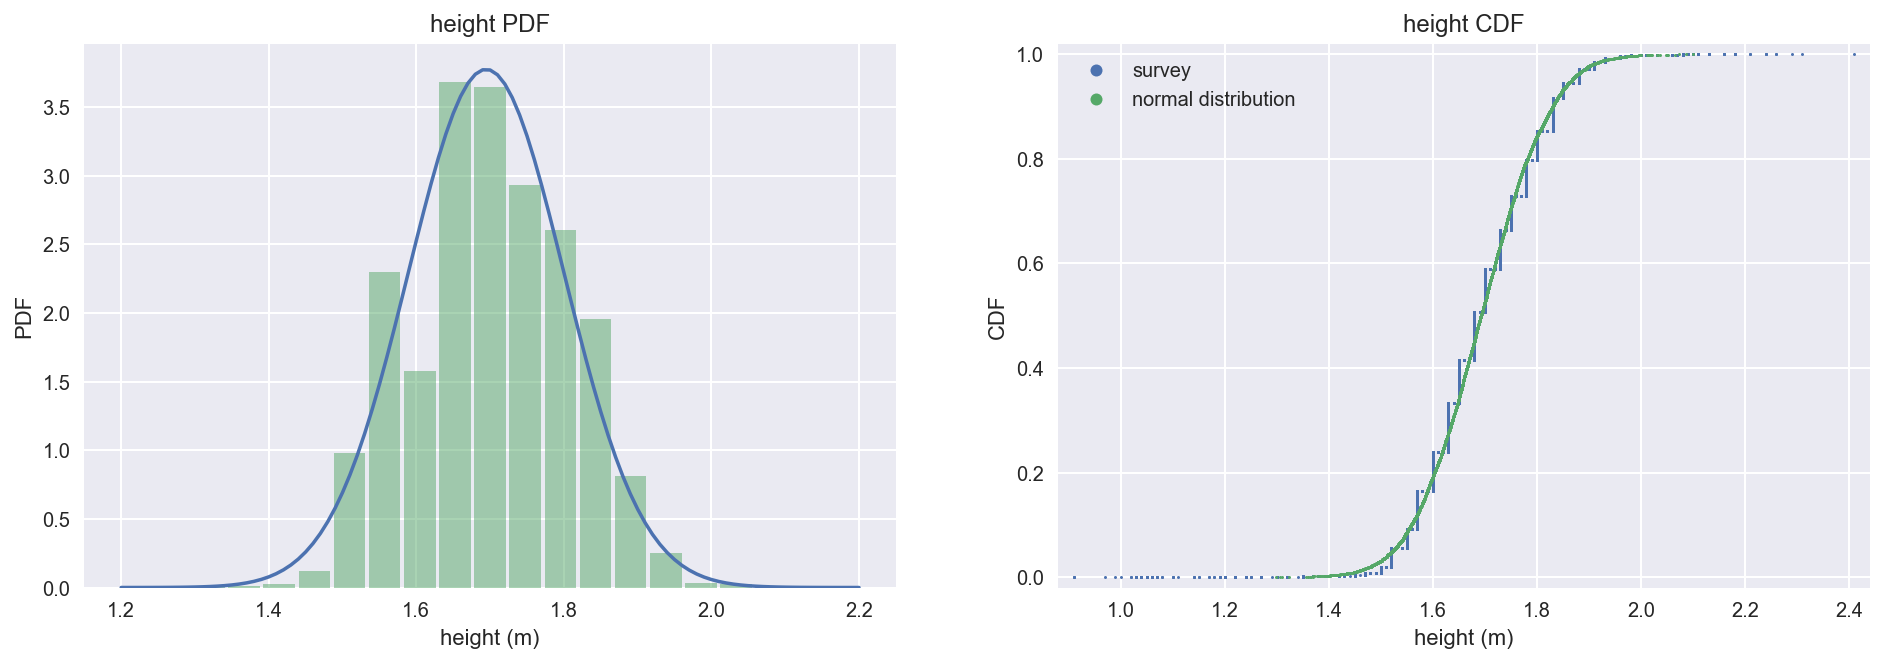

In [316]:
height = df.height.dropna()

fig = plt.figure(figsize=(16,5))

p1 = fig.add_subplot(121)
# plot normal distribution curve
height_std = height.std()
height_mean = height.mean()
x = np.arange(1.2,2.2,0.01)
y = norm_pdf(x, height_mean, height_std)
plt.plot(x,y)
# plot histogram
plt.hist(height, bins=21, range=(1.2,2.2), rwidth=0.9, alpha=0.5, normed=True)
plt.title('height PDF')
plt.xlabel('height (m)')
plt.ylabel('PDF')

p2 = fig.add_subplot(122)
plot_ecdf(height, xlabel='height', label='survey')
sample = np.random.normal(height_mean, height_std, size=10000)
plot_ecdf(sample, xlabel='height (m)', label='normal distribution')
plt.title('height CDF')
plt.show()

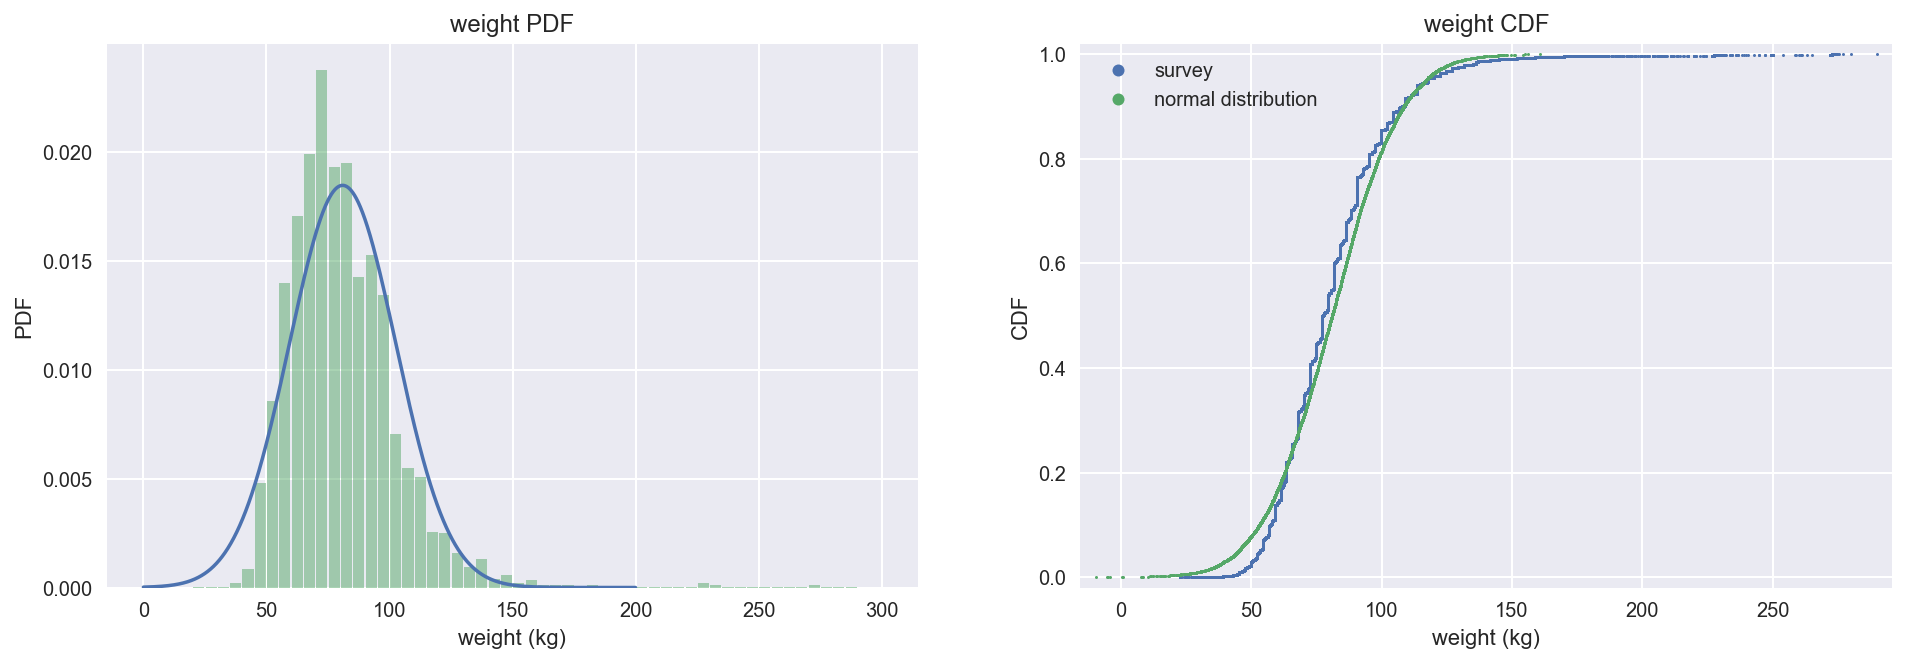

In [317]:
weight = df.weight.dropna()

fig = plt.figure(figsize=(16,5))

p1 = fig.add_subplot(121)
# plot normal distribution curve
weight_std = weight.std()
weight_mean = weight.mean()
x = np.arange(0,200,0.1)
y = norm_pdf(x, weight_mean, weight_std)
plt.plot(x,y)
# plot histogram
plt.hist(weight, bins=60, range=(0,300), rwidth=0.9, alpha=0.5, normed=True)
plt.title('weight PDF')
plt.xlabel('weight (kg)')
plt.ylabel('PDF')

p2 = fig.add_subplot(122)
plot_ecdf(weight, xlabel='weight', label='survey')
sample = np.random.normal(weight_mean, weight_std, size=10000)
plot_ecdf(sample, xlabel='weight (kg)', label='normal distribution')
plt.title('weight CDF')
plt.show()

#### The lognormal distribution

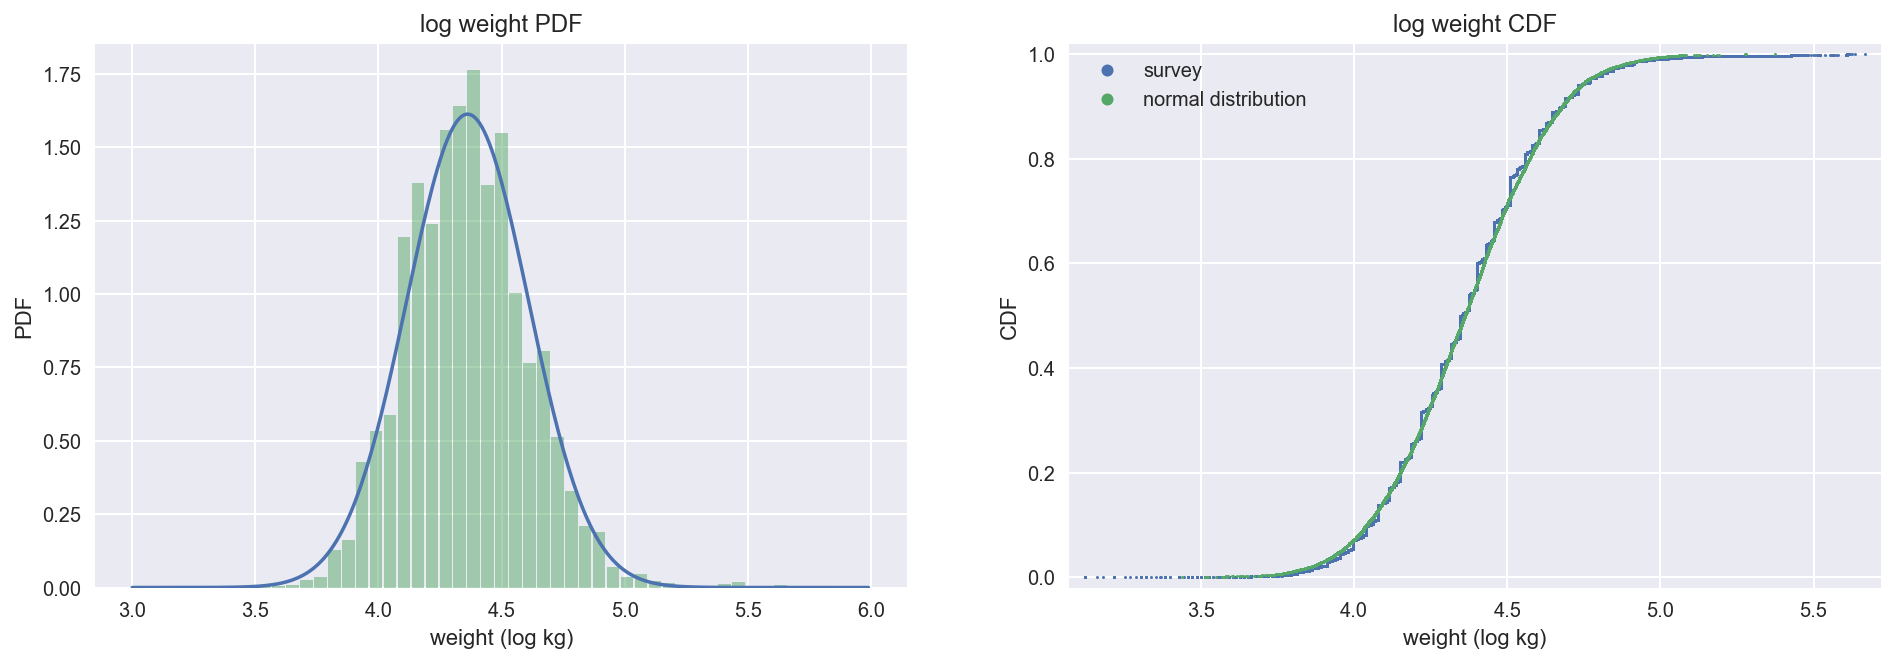

In [320]:
log_weight = np.log(df.weight.dropna())

fig = plt.figure(figsize=(16,5))

p1 = fig.add_subplot(121)
# plot normal distribution curve
log_weight_std = log_weight.std()
log_weight_mean = log_weight.mean()
x = np.arange(3,6,0.01)
y = norm_pdf(x, log_weight_mean, log_weight_std)
plt.plot(x,y)
# plot histogram
plt.hist(log_weight, bins=53, range=(3,6), rwidth=0.9, alpha=0.5, normed=True)
plt.title('log weight PDF')
plt.xlabel('weight (log kg)')
plt.ylabel('PDF')

p2 = fig.add_subplot(122)
plot_ecdf(log_weight, xlabel='weight (log kg)', label='survey')
sample = np.random.normal(log_weight_mean, log_weight_std, size=10000)
plot_ecdf(sample, xlabel='weight (log kg)', label='normal distribution')
plt.title('log weight CDF')
plt.show()

## Estimation

### Central Limit Theorem  & Sampling distribution